# Midterm 2 - Coding Portion

## Data Visualization

In [406]:
#grab data from csv and insert into dataframe

import pandas as pd

df = pd.read_csv('data.csv')

#5 features
#Binary classifier target = Y

print(df.head())
print()

#print number of rows = 8143
numRows = len(df.index)
print(numRows)

      X1       X2     X3      X4        X5  Y
0  23.18  27.2720  426.0  721.25  0.004793  1
1  23.15  27.2675  429.5  714.00  0.004783  1
2  23.15  27.2450  426.0  713.50  0.004779  1
3  23.15  27.2000  426.0  708.25  0.004772  1
4  23.10  27.2000  426.0  704.50  0.004757  1

8143


In [407]:
#NO Missing/NA Values

df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
Y     0
dtype: int64

In [408]:
#mins and maxes of each column

#print min of each col
print(df.min())
print()

#print max of each col
print(df.max())
print()

#print avg of each col 
print(df.mean())

X1     19.000000
X2     16.745000
X3      0.000000
X4    412.750000
X5      0.002674
Y       0.000000
dtype: float64

X1      23.180000
X2      39.117500
X3    1546.333333
X4    2028.500000
X5       0.006476
Y        1.000000
dtype: float64

X1     20.619084
X2     25.731507
X3    119.519375
X4    606.546243
X5      0.003863
Y       0.212330
dtype: float64


In [409]:
#imbalanced between class 0 and 1 for the Y target column

print(df['Y'].value_counts(ascending=True))

Y
1    1729
0    6414
Name: count, dtype: int64


In [410]:
#print correlation matrix numerically
corr = df.corr()
print(corr)

          X1        X2        X3        X4        X5         Y
X1  1.000000 -0.141759  0.649942  0.559894  0.151762  0.538220
X2 -0.141759  1.000000  0.037828  0.439023  0.955198  0.132964
X3  0.649942  0.037828  1.000000  0.664022  0.230420  0.907352
X4  0.559894  0.439023  0.664022  1.000000  0.626556  0.712235
X5  0.151762  0.955198  0.230420  0.626556  1.000000  0.300282
Y   0.538220  0.132964  0.907352  0.712235  0.300282  1.000000


<Axes: >

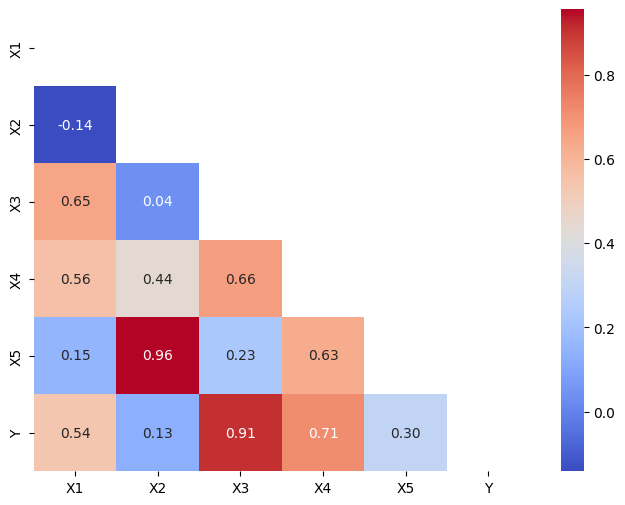

In [411]:
#now print correlation matrix in graph form
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set figure size
plt.figure(figsize = (8,6))

#Remove diagonal and upper triangle values
maskedCorr = np.zeros_like(corr, dtype=bool)
maskedCorr[np.triu_indices_from(maskedCorr)] = True
corr[maskedCorr] = np.nan
(corr
 .style
 .format(precision=2))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=df.columns, yticklabels=df.columns)

#high correlation between (X2, X5) and (X3, Y)

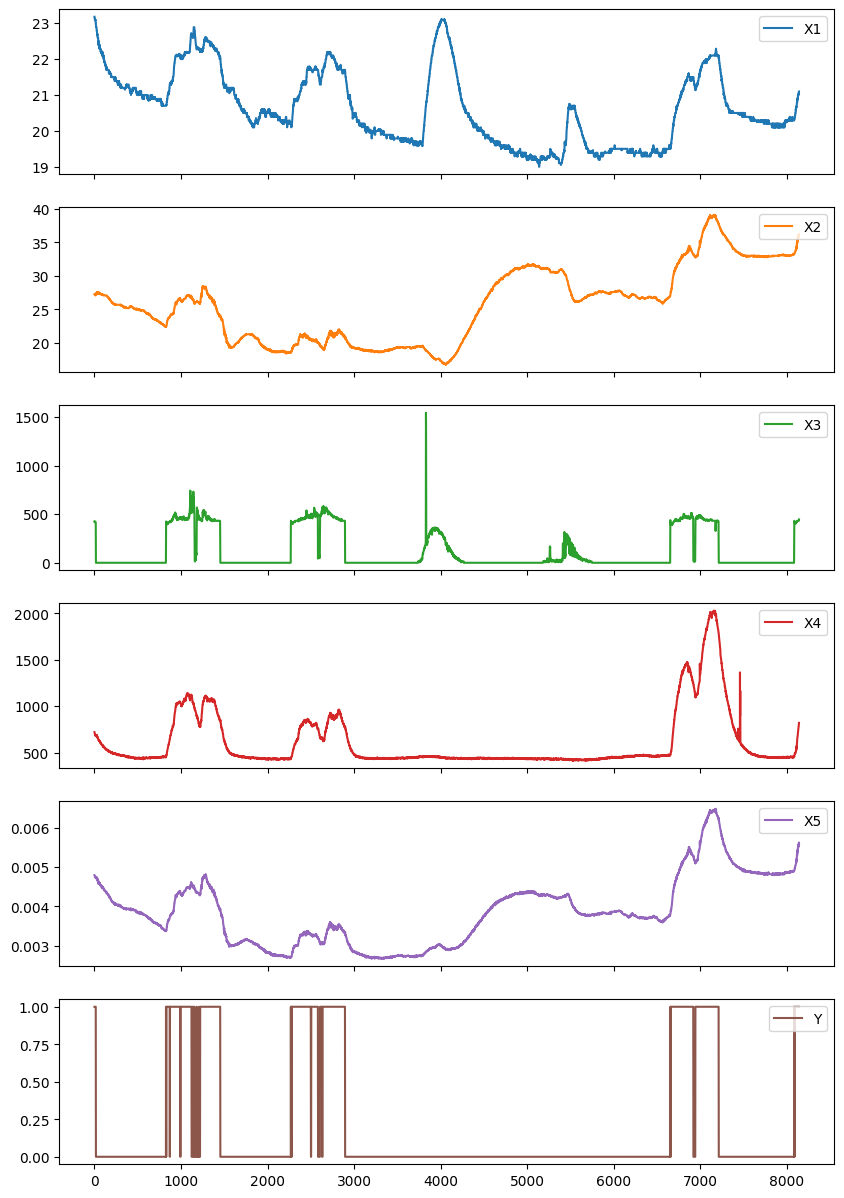

In [412]:
#Plots for occurences along the given dataset
axes = df.plot.line(subplots=True, figsize = (10,15))

#show col name in top right
for ax in axes:
    ax.legend(loc = 'upper right')

#noticeable outlier(s) in X3 and X4
#Y has more values as 0. This verifies what we saw in a previous cell describing the values within the Y column

## Data Preparation

In [413]:
#train test split of df

from sklearn.model_selection import train_test_split

#split into features and target
x = df.drop(['Y'],axis=1).values
y = df['Y'].values

#then split into train, test, validation
#       80/10/10 split
#       train/test/validation
xTrain, xRest, yTrain, yRest = train_test_split(x, y, test_size=0.2)
xTest, xVal, yTest, yVal = train_test_split(xRest, yRest, test_size=0.5)

#size of train set = 6514 = 0.8 * numRows = 0.8 * 8143
print(len(xTrain))
print(len(yTrain))

#size of test set = 814 = 0.1 * numRows = 0.1 * 8143
print(len(xTest))
print(len(yTest))

6514
6514
814
814


In [414]:
#normalize the data with StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler on training data then transform both training and test sets
xTrainNorm = scaler.fit_transform(xTrain)
xTestNorm = scaler.transform(xTest)

## Model Creation - NN

In [415]:
#model creation and summary

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

#begin creating the model
model = Sequential()

# The first hidden layer has 500 neurons accepting input from 5 features
model.add(Dense(500, input_shape=(5,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The second hidden layer has 500 neurons
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The third hidden layer has 350 neurons
model.add(Dense(350))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The fourth hidden layer has 200 neurons
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The final layer is output for binary classification
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Summarize the built model
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 500)               3000      
                                                                 
 activation_56 (Activation)  (None, 500)               0         
                                                                 
 dropout_40 (Dropout)        (None, 500)               0         
                                                                 
 dense_57 (Dense)            (None, 500)               250500    
                                                                 
 activation_57 (Activation)  (None, 500)               0         
                                                                 
 dropout_41 (Dropout)        (None, 500)               0         
                                                                 
 dense_58 (Dense)            (None, 350)             

In [416]:
#model compilation

from keras import metrics

#use accuracy, precision, and recall
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

## Model Training

In [418]:
#Training
model.fit(xTrainNorm, yTrain, batch_size=128, epochs=10, verbose=1)
#notice we also see the precision and recall as well

Epoch 1/10
51/51 [==============================] - 2s 8ms/step - loss: 0.1102 - accuracy: 0.9698 - precision_14: 0.9141 - recall_12: 0.9487
Epoch 2/10
51/51 [==============================] - 0s 6ms/step - loss: 0.0448 - accuracy: 0.9883 - precision_14: 0.9504 - recall_12: 0.9979
Epoch 3/10
51/51 [==============================] - 0s 7ms/step - loss: 0.0425 - accuracy: 0.9880 - precision_14: 0.9498 - recall_12: 0.9971
Epoch 4/10
51/51 [==============================] - 0s 6ms/step - loss: 0.0368 - accuracy: 0.9882 - precision_14: 0.9498 - recall_12: 0.9979
Epoch 5/10
51/51 [==============================] - 0s 7ms/step - loss: 0.0321 - accuracy: 0.9888 - precision_14: 0.9530 - recall_12: 0.9971
Epoch 6/10
51/51 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.9885 - precision_14: 0.9542 - recall_12: 0.9943
Epoch 7/10
51/51 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.9883 - precision_14: 0.9585 - recall_12: 0.9886
Epoch 8/10
51

## Performance Evaluation

26/26 [==============================] - 0s 1ms/step


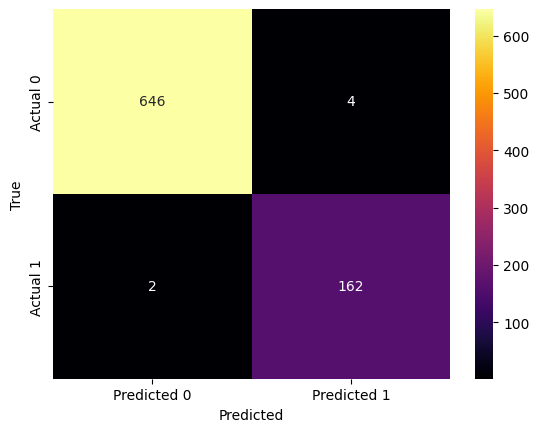

In [419]:
#prediction

from sklearn.metrics import confusion_matrix

yPred = model.predict(xTestNorm)

#predict class based on probabilities greater than 50%
yPredClasses = (yPred > 0.5).astype(int)

#construct confusion matrix
cm = confusion_matrix(yTest, yPredClasses)

#plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="inferno", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#only 6 are misclassified

In [420]:
#evaluation

score = model.evaluate(xTestNorm, yTest)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# over 99.26% accuracy with 0.026 loss.
#I'm quite happy with this :)

26/26 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9926 - precision_14: 0.9759 - recall_12: 0.9878
Test score: 0.02670321986079216
Test accuracy: 0.9926289916038513


Epoch 1/12
204/204 [==============================] - 1s 6ms/step - loss: 11.1186 - accuracy: 0.9022 - precision_14: 0.7240 - recall_12: 0.8824 - val_loss: 0.1474 - val_accuracy: 0.9067 - val_precision_14: 0.6807 - val_recall_12: 1.0000
Epoch 2/12
204/204 [==============================] - 1s 6ms/step - loss: 0.2181 - accuracy: 0.9231 - precision_14: 0.7475 - recall_12: 0.9708 - val_loss: 0.1407 - val_accuracy: 0.9117 - val_precision_14: 0.6923 - val_recall_12: 1.0000
Epoch 3/12
204/204 [==============================] - 1s 6ms/step - loss: 0.1474 - accuracy: 0.9275 - precision_14: 0.7534 - recall_12: 0.9865 - val_loss: 0.1368 - val_accuracy: 0.9153 - val_precision_14: 0.7031 - val_recall_12: 0.9938
Epoch 4/12
204/204 [==============================] - 1s 5ms/step - loss: 0.1478 - accuracy: 0.9277 - precision_14: 0.7524 - recall_12: 0.9900 - val_loss: 0.1301 - val_accuracy: 0.9166 - val_precision_14: 0.7043 - val_recall_12: 1.0000
Epoch 5/12
204/204 [==============================] - 1

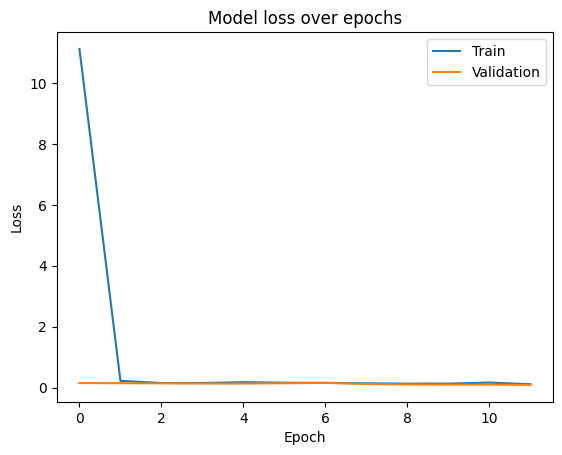

In [421]:
history = model.fit(xTrain, yTrain, epochs=12, validation_data=(xVal, yVal))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#95.50% accuracy
#84.95% precision
#96.15% recall

#0.0848 loss

# Response to Questions on Project Description

## What accuracy can you reach?

### *The highest accuracy I attained was 99.26% accuracy.*

## Did you experience any overfitting or underfitting for your model? If yes, how did you fix it?

### *My model showed no signs of over/underfitting throughout the design process, even with improvements to the evaluation metrics.*